# Import algorithms

In [1]:
from ga import GeneticAlgorithm
from backtrack import Backtracking
from bruteforce import BruteForce

# Test

In [2]:
GeneticAlgorithm(10)

(7, 2, 4, 9, 1, 8, 5, 3, 6, 0)

In [3]:
Backtracking(10)

(0, 2, 5, 7, 9, 4, 8, 1, 3, 6)

In [4]:
BruteForce(10)

(0, 2, 5, 7, 9, 4, 8, 1, 3, 6)

# Experiment
In this section, I will compare the performance of three algorithms for solving the N-Queens problem: **Genetic Algorithm (GA)**, **Backtracking**, and **Brute Force**.

The test cases will be the range `n = [4, 40]`. Each algorithm is allowed a **maximum of 30 seconds** to find a valid solution. If an algorithm fails to find a solution within that time limit, the result will be marked as `timeout`.

Each algorithm will return the runtime (in seconds), and results will be plotted to observe their scalability.

In [5]:
import time
import matplotlib.pyplot as plt
import multiprocessing

test_cases = range(4, 41)

def run_with_timeout(func, args=(), timeout=30):
    with multiprocessing.Pool(processes=1) as pool:
        res = pool.apply_async(func, args=args)
        try:
            return res.get(timeout)
        except multiprocessing.TimeoutError:
            print(f"Timed out at N = {args[0]}")
            pool.terminate()
            return None

## Genetic Algorithm

In [6]:
times_1 = []
for n in test_cases:
    start = time.time()
    result = run_with_timeout(GeneticAlgorithm, args=(n,))
    end = time.time()

    if result is None:
        times_1.append(float('inf'))
        break
    else:
        times_1.append(end - start)

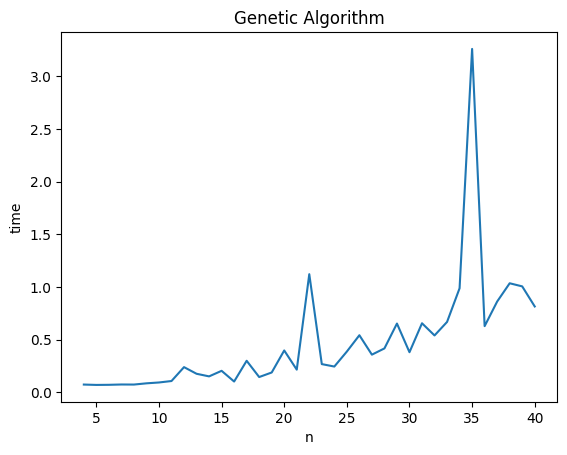

In [7]:
plt.plot(test_cases, times_1)
plt.title("Genetic Algorithm")
plt.xlabel("n")
plt.ylabel("time")
plt.show()

## 

## Backtrack

In [8]:
times_2 = []
for n in test_cases:
    start = time.time()
    result = run_with_timeout(Backtracking, args=(n,))
    end = time.time()

    if result is None:
        times_2.append(float('inf'))
        break
    else:
        times_2.append(end - start)

Timed out at N = 28


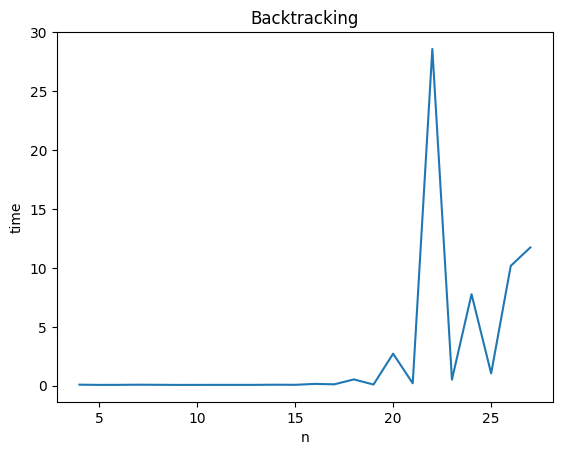

In [19]:
plt.plot(range(4, len(times_2) + 4), times_2)
plt.title("Backtracking")
plt.xlabel("n")
plt.ylabel("time")
plt.show()

## Bruteforce

In [20]:
times_3 = []
for n in test_cases:
    start = time.time()
    result = run_with_timeout(BruteForce, args=(n,))
    end = time.time()

    if result is None:
        times_3.append(float('inf'))
        break
    else:
        times_3.append(end - start)

Timed out at N = 14


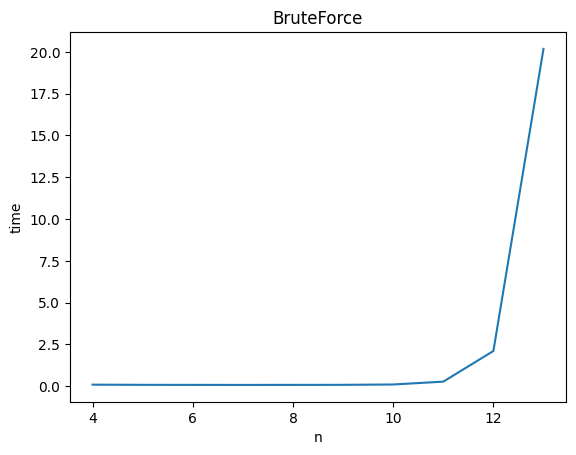

In [21]:
plt.plot(range(4, len(times_3) + 4), times_3)
plt.title("BruteForce")
plt.xlabel("n")
plt.ylabel("time")
plt.show()

# Result

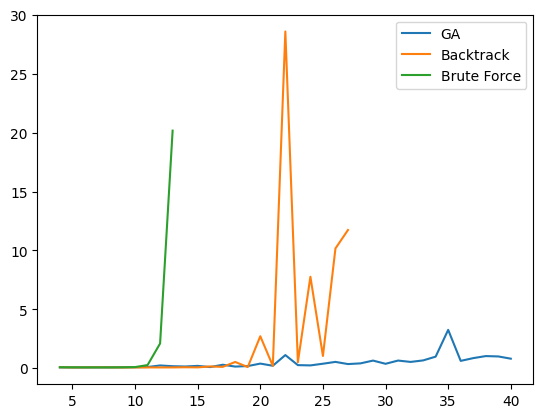

In [22]:
plt.plot(test_cases, times_1, label='GA')
plt.plot(range(4, len(times_2) + 4), times_2, label='Backtrack')
plt.plot(range(4, len(times_3) + 4), times_3, label='Brute Force')

plt.legend()
plt.show()

In [23]:
# Average GA
sum(times_1) / len(times_1)

0.47514816232629725

In [24]:
# Max GA
max(times_1)

3.2595269680023193

- **Genetic Algorithm** easily passes all test cases, with an **impressive average time of 0.47s**. Its **worst-case time** is only **3.26s**, even for large `n = 40`.
- In contrast, **Backtracking** starts struggling after `n = 27` and fails (times out) at `n = 28`.
- **Brute Force** performs poorly beyond small values of `n`, and times out starting from `n = 14`.

This demonstrates the **scalability** of heuristic methods like Genetic Algorithm compared to classical exhaustive techniques.
